Derived from University of Michigan - ROB 101 Computational Linear Algebra


# Calculation, Matrices, and Graphing with Julia

#### Purpose:  Use Julia Programming to solve mathematical problems
- Outline:
    - Calculaton with Julia
        - Codeblocks and Operators
        - Functions for Computation and Display
    - Data Manipulation with Julia
        - Variables
        - Vectors
        - Matrices
    - Variables
        -Data Storage
        -Custom Functions
    - Graphing with Julia
        - Graphing Vectors
        - Graphing Functions


Julia is a programming language which allows users to input a series of commands, typically one on each line, to perform any number of tasks typically involving data manipulation.

This assignment is a Jupyter notebook, which is a collection of code blocks.

Running a code block executes each non-comment line in the block.

In [3]:
#you can edit this code block by clicking into it
#pressing SHIFT+ENTER runs the block
#running a code cell will display the result from the last line

#hashtags are comments, and anything following a hashtag will not be run.

#say that you're talking abt the header

12/2

6.0

In [4]:
#other results are computed, but NOT displayed
5 * 6 # * is the multiplication operator
6 ^ 3 # ^ is the exponentiation operator
4 == 2 #this operator returns true when both sides are equal 


false

In [1]:
#Julia performs arithmetic operations in PEMDAS order:
#Parentheses, Exponentiation, Multiplication, Division, Addition, Subtraction

#TODO: Add parentheses to make this line return true
130 == 5 + 5 / 2 + 3 + 2 ^ 2 + 1

false

In [5]:
#operators are all actually functions in disguise!

+(2,3)

#still probably better to use 2 + 3 for readability

5

Julia has many other built in functions.

- round() #rounds to nearest integer
- ceil() #rounds up
- floor() #rounds down
- trunc() #chops off anything beyond decimal point
- abs() #absolute value
- sin(), cos(), tan()  and asin(), acos(), atan()  #many more trigonometric functions
- sqrt() #square root
- exp()  #natural exponential e^x
- log() #natural logarithm
- %() #remainder after division


and so many more: https://docs.julialang.org/en/v1/manual/mathematical-operations/


In [6]:
#the modulo function calculates remainder after division

#you can also call it like an operator for ease of use

10 % 3 #10 / 3 is 3, with a remainder of 1

1

In [7]:
#display and utility functions are also available
#to print multiple lines while running code, use println()
println(5 * 6)
println(6 / 3)
4 ^ 2 #we don't need a println call here because the last line is automatically shown

#...but julia adds a blank line before that output,
#so it is probably best to call println() regardless to make stuff look nice


30
2.0


16

In [2]:
#Greek letters are supported in Julia! they're a bit annoying to type, though...
#in julia, pi = π = 3.14159...... by default.
println(pi == π)

#trigonometric functions use radians, not degrees
sin(π)
#because the computer can't store data with perfect precision, this will return a number which is very close to 0.
#that "e-16" is scientific notation for " * 10^(-16)"
#so the absolute value of this number is around .00000000000000001. 

true


1.2246467991473532e-16

In [ ]:
#TODO: calculate e^(2+ln( |-.5| ))

**Arrays in Julia**

Arrays are collections of numbers across a space.

One dimensional arrays, or vectors, consist of a column of data.

Two dimensional arrays, or matrices, consist of a value at each point on a two-dimensional grid.

In [1]:
#use brackets and comma separated numbers to create a one dimensional array

[1,2,3,4,5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

Note that julia provides a header for more complicated outputs:

5-element Vector

This is a 5 element vector

{Int64,

of Ints (integers, not fractions)

1}

and the last term is 1, because this is a one-dimensional array.

The text below is not relevant for this introduction, so feel free to skip it.

The 64 in Int64 means that the computer is saying "we can store massive numbers here."
Some arrays can only store smaller numbers. For example, arrays of Int16 can only store numbers between -32,768 and 32,767.
Int64 arrays can store numbers much, much larger than a billion (or smaller than a negative billion).

In [2]:


#a matrix requires a bit more syntax. 
#Note that each horizontal line ends in a semicolon, and there are no commas.
#The output shows matrix dimensions in height by width
[1 2;
3 4;
5 6]

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

In [3]:
#TODO: make a 2 by 3 matrix


In [17]:
#another item we will likely use are ranges
#the syntax is beginning:increment:end
#or you can use beginning:end, and the default increment is one
1:10 == 1:1:10

true

In [15]:
#ranges behave just like vectors, but they're easier to write
[1,2,3,4,5,6,7,8,9,10] == 1:10

true

In [4]:
#TODO: create a range which equals this vector (replace the todos)
todo : todo : todo == [5,7,9,11]


LoadError: UndefVarError: todo not defined

In [ ]:
#TODO: create a range which equals this vector
todo : todo : todo == [4, 3, 2, 1]

In [6]:
#you can use . (a period) to call a function on each element of an array.
#this is called "broadcasting" the function over that array.
floor.([1.5,-2.5,3.0]) 

3-element Vector{Float64}:
  1.0
 -3.0
  3.0

In [33]:
#this is also possible with operators
[5,7,10] .% 2

3-element Array{Int64,1}:
 1
 1
 0

In [7]:
#of course, this also works on ranges!
#TODO: generate the first 5 square numbers by broadcasting a function (you decide!) over a range
#the first 5 square numbers are [1,4,9,16,25]


In [ ]:
#TODO: generate [1,0,1,0,1] using a broadcasted operator and a range
#hint: odd numbers have a remainder of 1 when you divide them by 2
#and even numbers have a remainder of 0 when you divide them by 2


**Creating and using variables**

It's common to want to store some computed values to use them later.
We do this by assigning variables with the = operator.

In [10]:
#the = operator assignes a value to a letter or word, which we call a variable.

x = 5 #x is assigned to be 5. 



5

In [12]:
x + 3 #we can call functions or operators on x, and it will be treated as 5.
#note that x is being used in a different cell: this assignment stores all variables between cells for later use.

8

In [ ]:
#TODO: assign x and y to make this equation true
x = TODO
y = TODO

x + y ^ 2 = 5

In [ ]:
#we can also assign arrays to variables
a = [1 2 3;
    4 5 6]
#TODO: set all elements of a to 0
#you can do this without copying the array: remember, = is a function!
a  0

**Solving and graphing your own functions**

Julia can also help solve any equation that you input.  There are two main ways to declare a function in Julia.

Let's practice with the basic linear function:  
                                                y = 2x 

The first one is the most simple:

In [17]:
#this defines a custom function that you can use in future lines of code
#make sure to run this code again if you restart and need to use f(x) again
f(x) = 2*x

f (generic function with 1 method)

In [27]:
#let's evaluate that function to try it out
println(f(5))
println(f(3))
println(f(-2))

10
6
-4


In [20]:
#of course, we can always just use a broadcast to make that statement cleaner!
f.([5,3,-2])

#explain what using does
#half assed explain what gr is

3-element Vector{Int64}:
 10
  6
 -4

In [23]:
#Now let's get ready to plot this function!

#These lines give Julia the ability to plot functions.  This may take a while, but it is necessary.
# When you see [*], that means Julia is working hard to do what you told it. Your commands may take just a few 
# lines, but Julia is probably dealing with a lot of files and code, all of which is hidden from us. 
using Plots
gr()

Plots.GRBackend()



For example, let's say we want to plot the function above from 0 to 5, with a data point at every whole number.
That would lead to this table:

| x       |             f(x) |
| :----------- | -----------: |
| 0      | 0       |
| 1   | 2        |
| 2      | 4       |
| 3   | 6        |
| 4      | 8       |
| 5   | 10        |


Julia's plot() function works by taking two inputs: 

- a vector representing the first column, your x values
- a vector representing the second column, your f(x) values

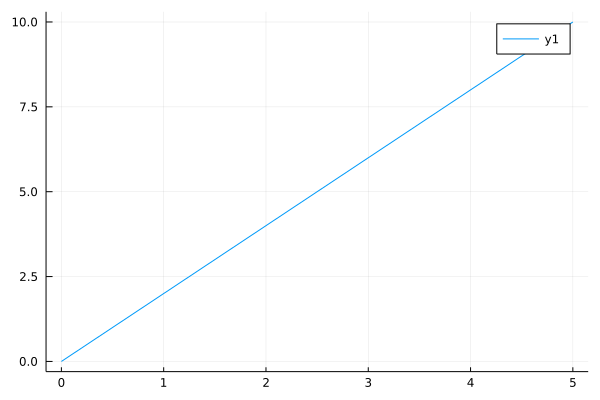

In [24]:
#so in julia, we would plot the table like this:
plot([0,1,2,3,4,5],
    [0,2,4,6,8,10])

#julia allows you to put arguments onto separate lines for readability. Just don't forget the comma.
#the "y1" here is because we didn't give this plot a name.

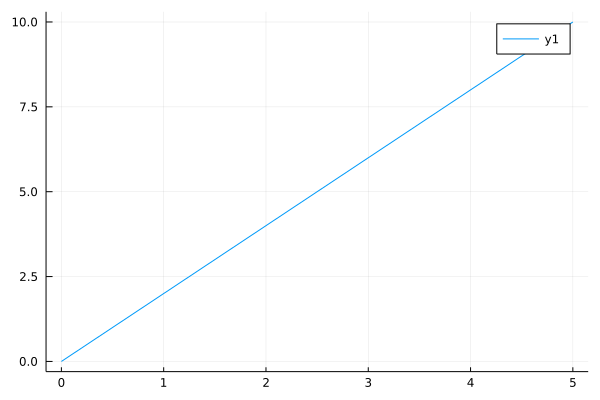

In [25]:
#of course, because we have f defined, we don't need to do the calculation by hand:
plot([0,1,2,3,4,5],
    f.([0,1,2,3,4,5]))

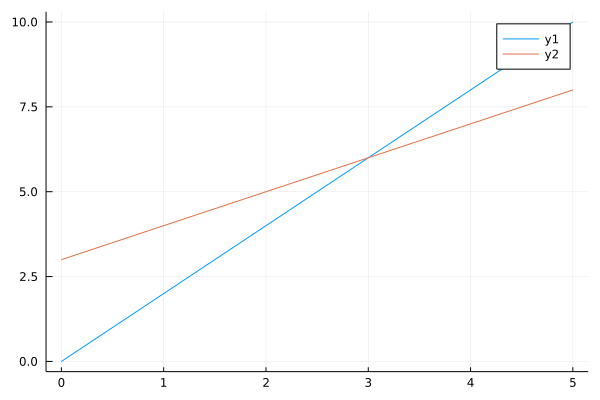

In [26]:
#add the nice range progression

#Instead of throwing out our old plot, we can always draw a new one on top of it
#You can do this by using plot!()

g(x) = x + 3 #let's define another function to try this out

#first, plot f from 0 to 5. Note that we can make plotting even easier with ranges!
plot(0:5,f.(0:5))

#now plot g from 0 to 5, on the same graph
plot!(0:5,g.(0:5))

#note that y1 is the first plot and y2 is the second.


This graph shows that f(x) = 2x intersects with f(x) = x + 3 at x=3! 
### Problem 2. Practice with one of the optional systems in the Drill Problem Set

                                                    x − 2y = −2
                                                     x + y = 4
                                                
                                                
                                                
Step 1:  Rearrange Both equations so that y is isolated on the left side:

Equation 1: y1 = ____________

Equation 2: y2 = ____________

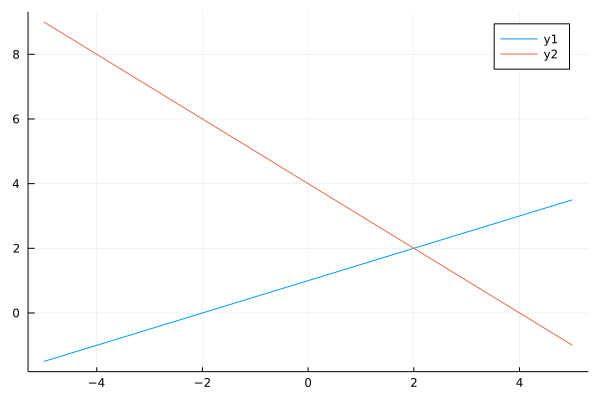

In [27]:
#declare both of those equations as code functions y1(x) and y2(x)

# your code here
y1(x) = x/2+1
y2(x) = 4-x

#Plot them on the same graph.  This shows another way to plot multiple things at once.
#Putting two vectors into brackets makes them into two columns of an array.
#the plot() command sees each column of the inputs as separate lines to plot.
plot(-5:5,y1.(-5:5))
plot!(-5:5,y2.(-5:5))

Now that you have plotted the system, you can find the solution as the intersection of the lines!
You could use this method to check most of your work from 